In [1]:
# This should be roughly the content of the first code cell
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

# Plotting support
from matplotlib import pyplot as plt
# from plotnine import *
# Standard libraries
import pandas as pd
import sklearn as sk
import tensorflow as tf
import time
import os
from skimage import io
import cv2
from scipy import stats
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from skimage.util import compare_images
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from PIL import Image

In [12]:
plt.rc('image', cmap='gray')

In [73]:
genuine_data = np.load('training/genuine_data.npy')

In [4]:
forged_data = np.load('training/forged_data.npy')

In [5]:
genuine_labels = np.load('training/genuine_labels.npy')

In [6]:
forged_labels= np.load('training/forged_labels.npy')

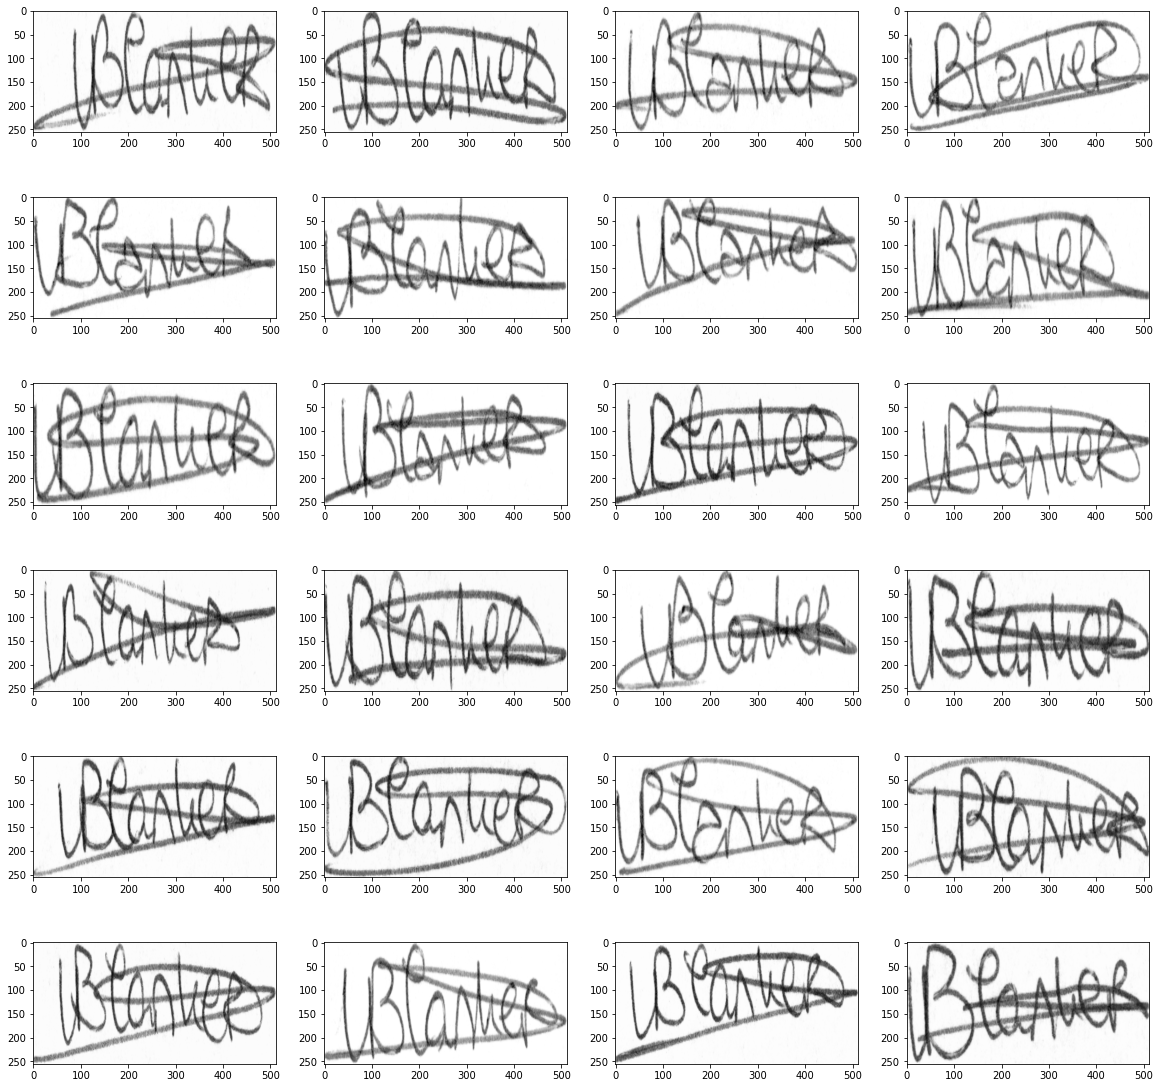

In [131]:
fig,ax = plt.subplots(6, 4, figsize=(20,20))
x = 0
y = 0
for image in genuine_data[genuine_labels== 3]:
    ax[x][y].imshow(image)
    x +=1
    if x == 6:
        x = 0
        y+=1

plt.savefig('images/genuine_sample.png')

In [10]:
np.bincount(genuine_labels)

array([ 0, 24, 24, 24, 24,  0, 24,  0,  0, 24,  0,  0, 24,  0, 24, 24, 23])

In [19]:
genuine_data[genuine_labels== 1].shape


(24, 256, 512)

In [32]:
forged_data[forged_labels == 1].shape


(8, 256, 512)

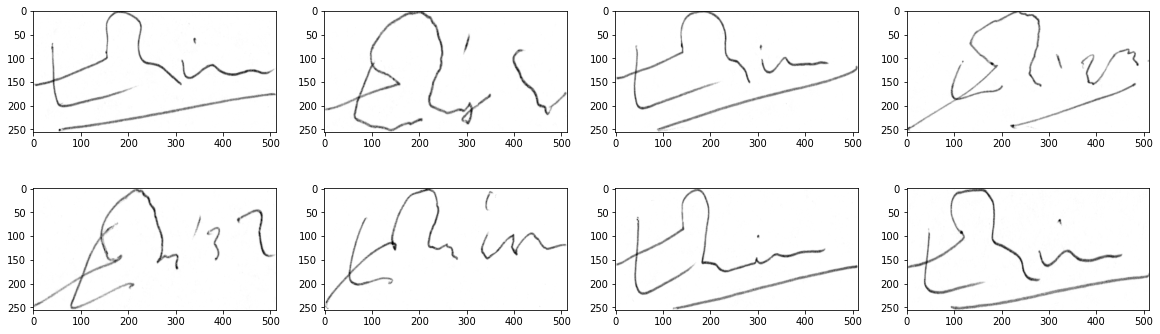

In [132]:
fig,ax = plt.subplots(2, 4, figsize=(20,6))
x = 0
y = 0
for image in forged_data[forged_labels == 1]:
    ax[x][y].imshow(image)
    x +=1
    if x == 2:
        x = 0
        y+=1

plt.savefig('images/forged_sample.png')

In [44]:
diff = compare_images(genuine_data[0], genuine_data[1], method='diff')

In [45]:
checkerboard = compare_images(genuine_data[0], genuine_data[1], method='checkerboard')

In [46]:
blend = compare_images(genuine_data[0], genuine_data[1], method='blend')

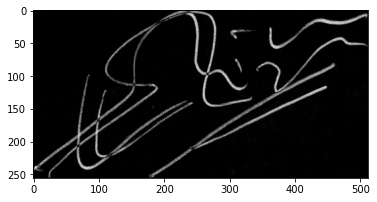

In [47]:
plt.imshow(diff)

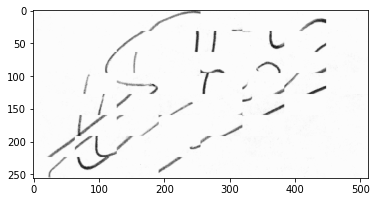

In [48]:
plt.imshow(checkerboard)

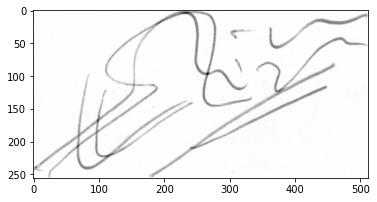

In [50]:
plt.imshow(blend)

In [52]:
np.mean(checkerboard), np.mean(diff), np.mean(blend)

(0.9713857919288341, 0.030103612693463747, 0.969557841589472)

In [55]:
mean_squared_error(genuine_data[0], genuine_data[1])

0.009630785698018432

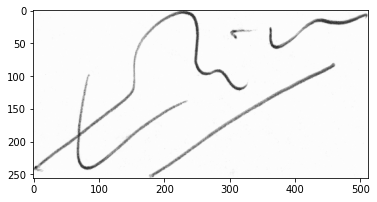

In [74]:
plt.imshow(genuine_data[0])

In [94]:
temp2= np.copy(genuine_data[0])

super_threshold_indices = temp2 > 0.8
temp2[ temp2 != super_threshold_indices] = 1
temp2[super_threshold_indices] = 0

In [95]:
temp3= np.copy(genuine_data[0])

super_threshold_indices = temp3 > 0.8
temp3[super_threshold_indices] = 1
temp3[ temp3 != super_threshold_indices] = 0

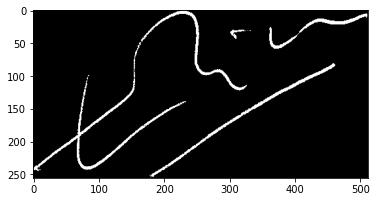

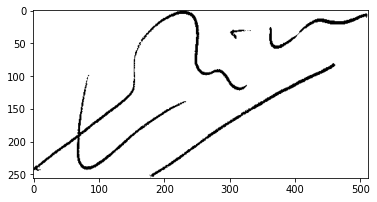

In [102]:
plt.imshow(temp2)
plt.show()
plt.imshow(temp3)
plt.show()

In [112]:
kernel = np.ones((1,1),np.uint8)
erosion = cv2.erode(temp2,kernel,iterations = 1)

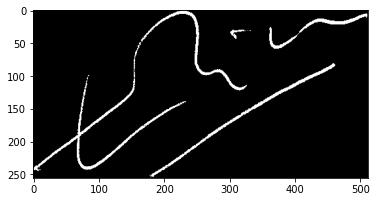

In [113]:
plt.imshow(erosion)

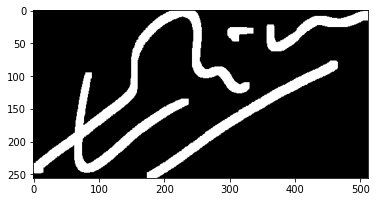

In [116]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(temp2, kernel, iterations=2)
plt.imshow(dilation)

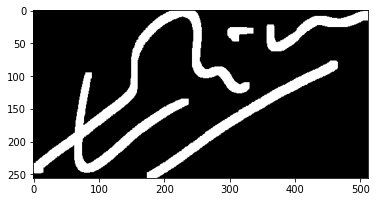

In [115]:
# dialate the erosion
d = cv2.dilate(erosion, kernel, iterations=2)
plt.imshow(d)

## Process all images to B&W and Dialated

In [97]:
def binarize_images(array):
    temp= np.copy(array)

    super_threshold_indices = temp > 0.8
    temp[ temp != super_threshold_indices] = 1
    temp[super_threshold_indices] = 0
    return temp

In [98]:
genuine_binary = binarize_images(genuine_data)

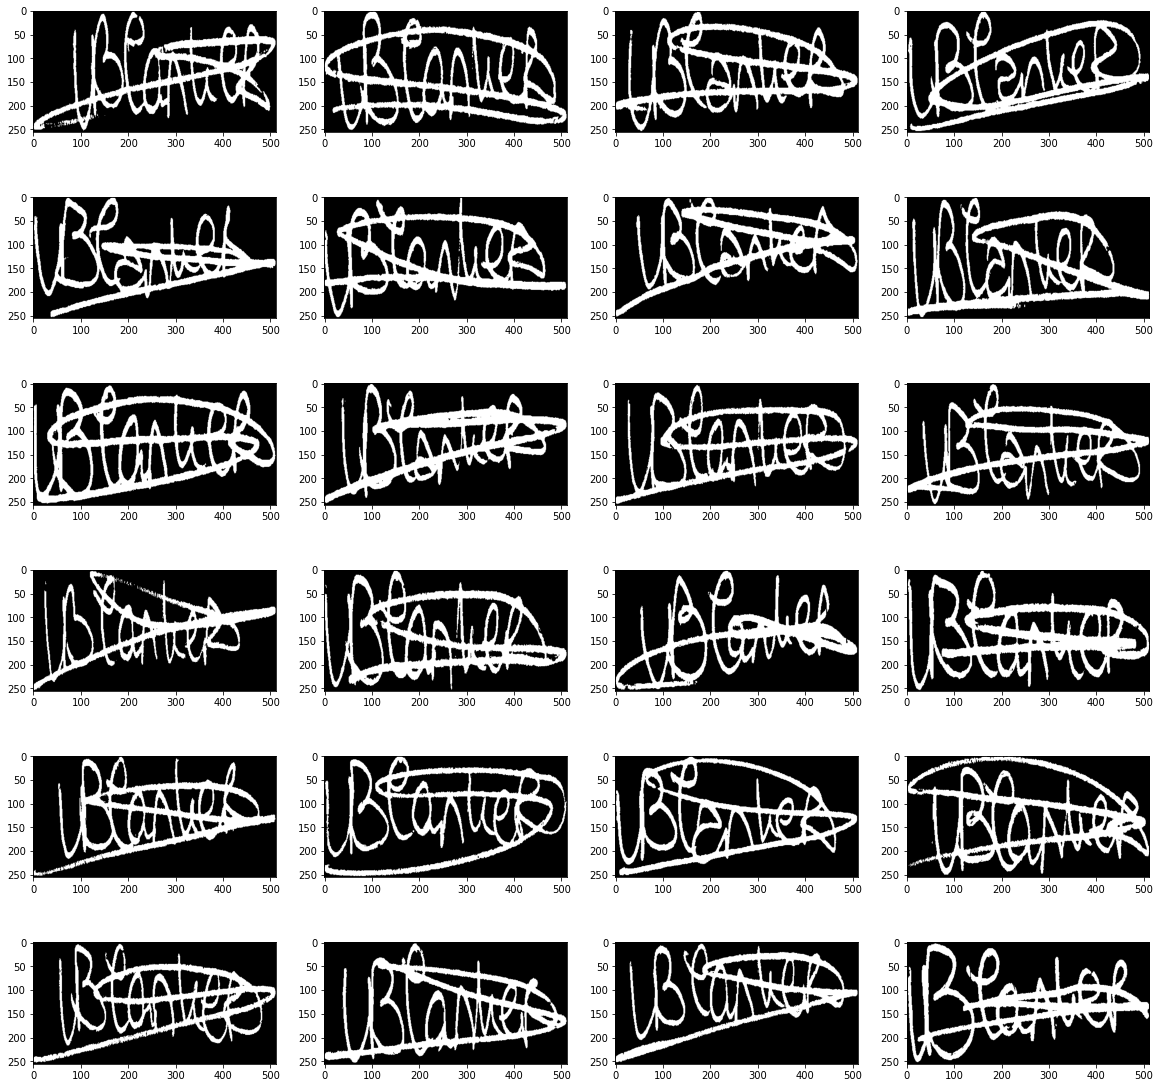

In [133]:

fig,ax = plt.subplots(6, 4, figsize=(20,20))
x = 0
y = 0
for image in genuine_binary[genuine_labels== 3]:
    ax[x][y].imshow(image)
    x +=1
    if x == 6:
        x = 0
        y+=1

plt.savefig('images/genuine_binary.png')

In [125]:
def dilate_images(array):
    temp = []
    kernel = np.ones((5,5),np.uint8)

    for image in array:
        dilation = cv2.dilate(image, kernel, iterations=2)
        temp.append(dilation)
    return np.array(temp)

In [126]:
genuine_dilated = dilate_images(genuine_binary)

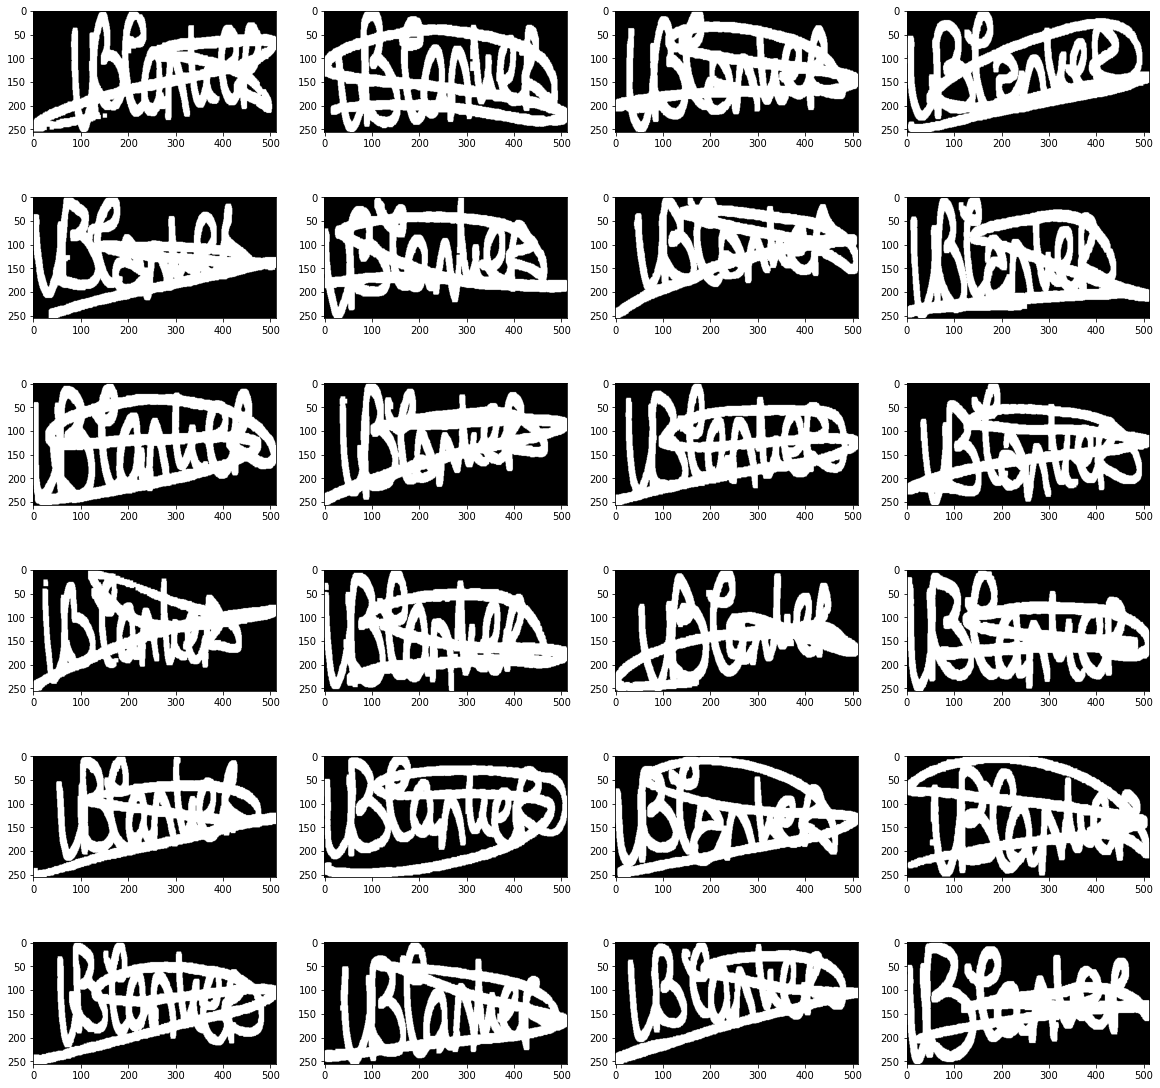

In [134]:
fig,ax = plt.subplots(6, 4, figsize=(20,20))
x = 0
y = 0
for image in genuine_dilated[genuine_labels== 3]:
    ax[x][y].imshow(image)
    x +=1
    if x == 6:
        x = 0
        y+=1

plt.savefig('images/genuine_dilated.png')

In [136]:
np.save('training/genuine_processed.npy', genuine_dilated)

In [137]:
forged_binary = binarize_images(forged_data)

In [138]:
forged_dilated = dilate_images(forged_binary)

In [139]:
np.save('training/forged_processed.npy', forged_dilated)